In [167]:
# Reading in StarWars.cvs and including only rows where 'RespondentID' (number for survey ID of each survey respondent) 
# is not null.

import pandas as pd
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")
star_wars = star_wars.dropna(subset=['RespondentID'])

# Converting answers in colums 'Have you seen any of the 6 films in the Star Wars franchise?' and 
# 'Do you consider yourself to be a fan of the Star Wars film franchise?' to boolean values using 
#  pandas.Series.map().

yes_no = {"Yes": True, "No":False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


print (star_wars.head())


   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please

In [168]:
# Using a mapping dictionary to change answer to 'Which of the following Star Wars films have 
# you seen? Please select all that apply.' to boolean values.
# The name of the movie in the data set means they've seen the movie and we are assuming NaN
# means they did not. 

import numpy as np

movies = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']
series = ['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

seen1 = {movies[0]:True, np.nan:False}
seen2 = {movies[1]:True, np.nan:False}
seen3 = {movies[2]:True, np.nan:False}
seen4 = {movies[3]:True, np.nan:False}
seen5 = {movies[4]:True, np.nan:False}
seen6 = {movies[5]:True, np.nan:False}

star_wars[series[0]] = star_wars[series[0]].map(seen1)
star_wars[series[1]] = star_wars[series[1]].map(seen2)
star_wars[series[2]] = star_wars[series[2]].map(seen3)
star_wars[series[3]] = star_wars[series[3]].map(seen4)
star_wars[series[4]] = star_wars[series[4]].map(seen5)
star_wars[series[5]] = star_wars[series[5]].map(seen6)

# Renaming items in series to 'seen_1', 'seen_2' ... to represent Episode 1, Episode 2 ... 

star_wars = star_wars.rename(columns={
        series[0]: "seen_1",
        series[1]: "seen_2",
        series[2]: "seen_3",
        series[3]: "seen_4",
        series[4]: "seen_5",
        series[5]: "seen_6"
         })

print (star_wars.head())

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True

In [169]:
# Converting each type in 'Please rank the Star Wars films in order of preference with 1 being your favorite 
# film in the franchise and 6 being your least favorite film.' to float.
# Renaming the columns in column to 'ranking_1', 'ranking_2' ...

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
column = ['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14']

star_wars = star_wars.rename(columns={
        column[0]: "ranking_1",
        column[1]: "ranking_2",
        column[2]: "ranking_3",
        column[3]: "ranking_4",
        column[4]: "ranking_5",
        column[5]: "ranking_6"
         })

print (star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


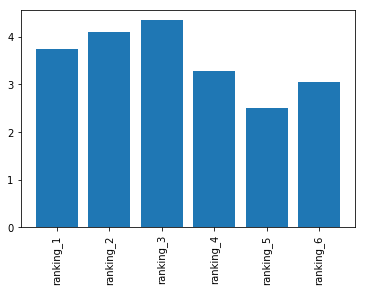

In [170]:
# Finding the mean of each column in ranks to find the highest rated movie.
# Generating a bar plot to show movies ('ranking_1' through 'ranking_6) vs. average score.

import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
ranks = ['0', 'ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
seen_film = ['0', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

means = star_wars[star_wars.columns[9:15]].mean()
print (means)

fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()


seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


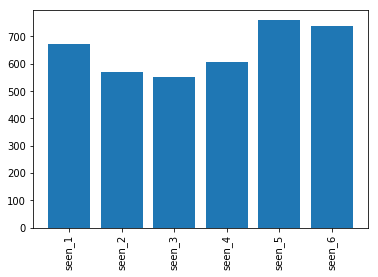

In [171]:
# Finding the sums of people who have seen each movie and 
# generating a bar plot to show results. 

sums = star_wars[star_wars.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()


ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64


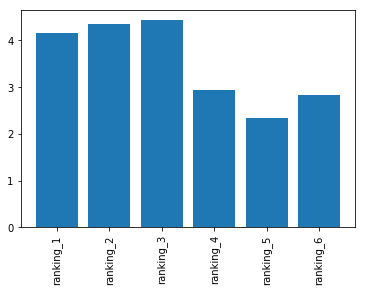

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64


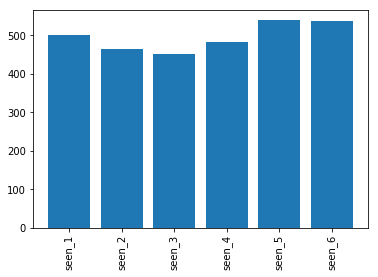

In [172]:
# Dividing DataFrame on binary columns to attempt to see relationships between ratings and the binary columns.
# Filtering out fans of 

fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
# fans_male = fans[fans['Gender'] == "Male"]

means = fans[fans.columns[9:15]].mean()
print (means)
fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()

sums = fans[fans.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()

ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


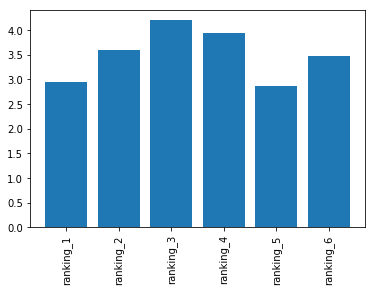

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


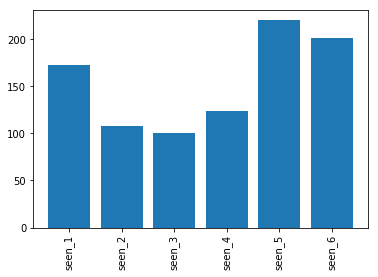

In [173]:
# Filtering the anwers who where not fans.

not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
means = not_fans[not_fans.columns[9:15]].mean()
print (means)

fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()

sums = not_fans[not_fans.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()

ranking_1    3.823529
ranking_2    4.239496
ranking_3    4.554622
ranking_4    3.172269
ranking_5    2.399160
ranking_6    2.810924
dtype: float64


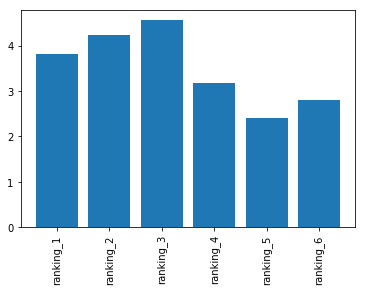

seen_1    208
seen_2    185
seen_3    175
seen_4    197
seen_5    231
seen_6    229
dtype: int64


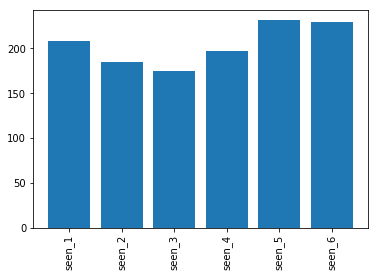

In [174]:
# Filtering female and fans.

female = star_wars[star_wars['Gender'] == "Female"]
female_fans = female[female['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
means = female_fans[female_fans.columns[9:15]].mean()
print (means)

fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()

sums = female_fans[female_fans.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()

ranking_1    4.402640
ranking_2    4.429043
ranking_3    4.311258
ranking_4    2.729373
ranking_5    2.287129
ranking_6    2.834983
dtype: float64


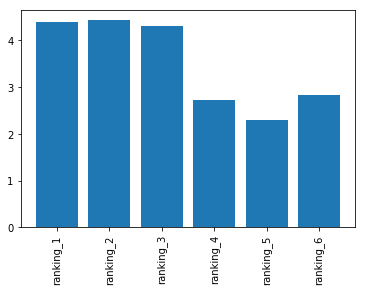

seen_1    282
seen_2    268
seen_3    265
seen_4    278
seen_5    297
seen_6    298
dtype: int64


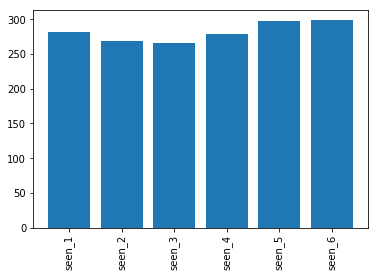

In [175]:
# Filtering male and fans. 

male = star_wars[star_wars['Gender'] == "Male"]
male_fans = male[male['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
means = male_fans[male_fans.columns[9:15]].mean()
print (means)

fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()

sums = male_fans[male_fans.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()

ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
ranking_4    3.433414
ranking_5    2.634383
ranking_6    3.244552
dtype: float64


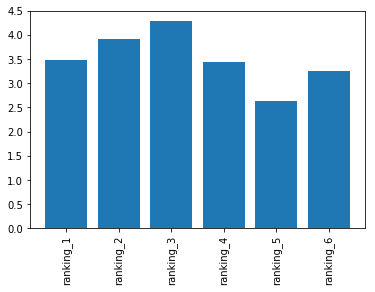

seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64


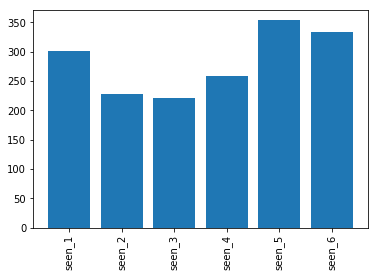

In [176]:
# Filtering if survey respondents are star_trek fans

star_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == "No"]
means = star_trek[star_trek.columns[9:15]].mean()
print (means)

fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()

sums = star_trek[star_trek.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()

ranking_1    4.262857
ranking_2    4.371429
ranking_3    4.400000
ranking_4    2.742857
ranking_5    2.280000
ranking_6    2.942857
dtype: float64


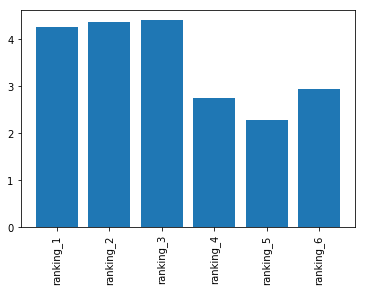

seen_1    160
seen_2    143
seen_3    139
seen_4    159
seen_5    171
seen_6    169
dtype: int64


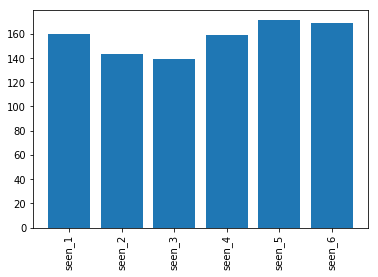

In [177]:
# Filtering if survey respondents are star_trek fans and star_wars fans.

star_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == "No"]
star_trek_wars = star_trek[star_trek['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
means = star_trek_wars[star_trek_wars.columns[9:15]].mean()
print (means)

fig, ax = plt.subplots()
ax.bar(range(6), means)
ax.set_xticklabels(ranks, rotation=90)
plt.show()

sums = star_trek_wars[star_trek_wars.columns[3:9]].sum()
print (sums)

    
fig, ax = plt.subplots()
ax.bar(range(6), sums)
ax.set_xticklabels(seen_film, rotation=90)
plt.show()